In [191]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb

# NLP libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Modelling libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Model evaluation libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, recall_score, precision_score,roc_auc_score

## DATA COLLECTION

In [192]:
train_df = pd.read_csv("data/Constraint_Train.csv")
valid_df = pd.read_csv("data/Constraint_Val.csv")
test_df = pd.read_csv("data/english_test_with_labels.csv")

## Train dataset Overview

In [193]:
print("Shape:", train_df.shape)

# Drop the Id attribute in the train dataset
train_df = train_df.drop(['id'], axis=1)
train_df.head()

Shape: (6420, 3)


,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [194]:
# Make sure that there is no null value in the train dataset
train_df.isnull().sum()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   6420 non-null   object
 1   label   6420 non-null   object
dtypes: object(2)
memory usage: 100.4+ KB


In [195]:
# Train data description
train_df.describe()

,tweet,label
count,6420,6420
unique,6420,2
top,BREAKING! Trump fans get busy injecting bleach...,real
freq,1,3360


In [196]:
# Replace label into binary values
train_df['label'] = train_df['label'].map({"real":1, "fake": 0})
train_df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,1
1,States reported 1121 deaths a small rise from ...,1
2,Politically Correct Woman (Almost) Uses Pandem...,0
3,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,Populous states can generate large case counts...,1


## Validation dataset Overview

In [197]:
print("Shape:", valid_df.shape)

valid_df = valid_df.drop(['id'], axis=1)
valid_df.head()

Shape: (2140, 3)


,tweet,label
0,Chinese converting to Islam after realising th...,fake
1,11 out of 13 people (from the Diamond Princess...,fake
2,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,Mike Pence in RNC speech praises Donald Trump’...,fake
4,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [198]:
valid_df.isnull().sum()
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2140 non-null   object
 1   label   2140 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [199]:
valid_df.describe()

,tweet,label
count,2140,2140
unique,2140,2
top,Metformin may lower risk for fatal COVID-19. h...,real
freq,1,1120


In [200]:
# Replace label into binary values
valid_df['label'] = valid_df['label'].map({"real":1, "fake": 0})
valid_df.head()

,tweet,label
0,Chinese converting to Islam after realising th...,0
1,11 out of 13 people (from the Diamond Princess...,0
2,"COVID-19 Is Caused By A Bacterium, Not Virus A...",0
3,Mike Pence in RNC speech praises Donald Trump’...,0
4,6/10 Sky's @EdConwaySky explains the latest #C...,1


## Test dataset Overview

In [201]:
print("Shape:", test_df.shape)

test_df = test_df.drop(['id'], axis=1)
test_df.head()

Shape: (2140, 3)


,tweet,label
0,Our daily update is published. States reported...,real
1,Alfalfa is the only cure for COVID-19.,fake
2,President Trump Asked What He Would Do If He W...,fake
3,States reported 630 deaths. We are still seein...,real
4,This is the sixth time a global health emergen...,real


In [202]:
test_df.isnull().sum()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2140 non-null   object
 1   label   2140 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [203]:
test_df.describe()

,tweet,label
count,2140,2140
unique,2140,2
top,The teenager has been interviewed thoroughly t...,real
freq,1,1120


In [204]:
# Replace label into binary values
test_df['label'] = test_df['label'].map({"real":1, "fake": 0})
test_df.head()

,tweet,label
0,Our daily update is published. States reported...,1
1,Alfalfa is the only cure for COVID-19.,0
2,President Trump Asked What He Would Do If He W...,0
3,States reported 630 deaths. We are still seein...,1
4,This is the sixth time a global health emergen...,1


In [205]:
data_frames = [train_df, valid_df]
main_train_df = pd.concat(data_frames)
main_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8560 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   8560 non-null   object
 1   label   8560 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 200.6+ KB


# DATA VISUALIZATION

       tweet
label       
0       4080
1       4480


<AxesSubplot:xlabel='label', ylabel='count'>

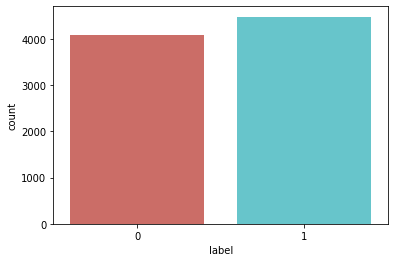

In [206]:
# Visualize data distribution for train data
print(main_train_df.groupby('label').count())
sb.countplot(x='label', data=main_train_df, palette='hls')

       tweet
label       
0       1020
1       1120


<AxesSubplot:xlabel='label', ylabel='count'>

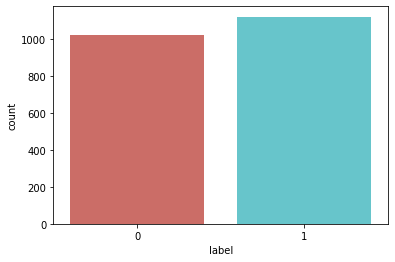

In [207]:
# Visualize data distribution for test data
print(test_df.groupby('label').count())
sb.countplot(x='label', data=test_df, palette='hls')

The data of training set, and test set seem to be evenly distributed between two labels through the graphs

# DATA CLEANING

### Convert text to lowercase

In [208]:
# Convert tweet content to lower case
main_train_df['tweet'] = [text.lower() for text in main_train_df['tweet']]
print(main_train_df['tweet'])

0       the cdc currently reports 99031 deaths. in gen...
1       states reported 1121 deaths a small rise from ...
2       politically correct woman (almost) uses pandem...
3       #indiafightscorona: we have 1524 #covid testin...
4       populous states can generate large case counts...
                              ...                        
2135    donald trump wrongly claimed that new zealand ...
2136    current understanding is #covid19 spreads most...
2137    nothing screams “i am sat around doing fuck al...
2138    birx says covid-19 outbreak not under control ...
2139    another 4422 new coronavirus cases have been c...
Name: tweet, Length: 8560, dtype: object


### Tokenize tweet content

In [209]:
# Split each tweet message into a list of word for feature extraction process later
tokenized_train_data = [word_tokenize(text) for text in main_train_df['tweet']]
print(tokenized_train_data[0])

['the', 'cdc', 'currently', 'reports', '99031', 'deaths', '.', 'in', 'general', 'the', 'discrepancies', 'in', 'death', 'counts', 'between', 'different', 'sources', 'are', 'small', 'and', 'explicable', '.', 'the', 'death', 'toll', 'stands', 'at', 'roughly', '100000', 'people', 'today', '.']


### Remove punctuations, special characters, url strips,...

In [220]:
# Remove all the characters, punctuations, url strips, numbers, emoji
import re

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

regex_pattern = re.compile('(@[a-z]+)|([^a-z \t])|(\w+:\/\/\S+)')
stopwords_removed_data = []

punct_removed_data = []

for tweet in tokenized_train_data:
    temp = []
    for word in tweet:
        new_word = re.sub(r'\d+','',word)
        new_word = re.sub(r'https\S+','',new_word)
        new_word = re.sub(r'http\S+','',new_word)
        new_word = emoji_pattern.sub(r'', new_word)
        new_word = regex_pattern.sub(u'', new_word)
        if not new_word == u'':
            temp.append(new_word)
    punct_removed_data.append(temp)

### Remove all the stopwords

In [221]:
# Removing all the stopwords

for tweet in punct_removed_data:
    temp = []
    for word in tweet:
        if not word in stopwords.words('english'):
            temp.append(word)
    stopwords_removed_data.append(temp)
    
print(stopwords_removed_data[0])

['cdc', 'currently', 'reports', 'deaths', 'general', 'discrepancies', 'death', 'counts', 'different', 'sources', 'small', 'explicable', 'death', 'toll', 'stands', 'roughly', 'people', 'today']


### Stemming and Lemmatizing

In [222]:
# Stemming and lemmatizing data

stemmer = PorterStemmer()
lemmer = WordNetLemmatizer()

clean_train_data = []

for tweet in stopwords_removed_data:
    temp = []
    for word in tweet:
        stemmer.stem(word)
        temp.append(lemmer.lemmatize(word))
    clean_train_data.append(temp)
print(clean_train_data[0])

['cdc', 'currently', 'report', 'death', 'general', 'discrepancy', 'death', 'count', 'different', 'source', 'small', 'explicable', 'death', 'toll', 'stand', 'roughly', 'people', 'today']


# EXTRACT FEATURES - FEATURE SELECTION
 


### Bag-of-words Method

In [223]:
def dummy(doc):
    return doc

In [277]:

# Fit the cleaned tokenized train data to create a bag of words relating to Covid-19 news
count_vect = CountVectorizer(tokenizer=dummy, preprocessor=dummy, token_pattern=None, analyzer='word')
covid_word_bag = count_vect.fit(clean_train_data)

In [225]:
# Convert the word bag to a dataframe to visualize
df_covid_word_bag = pd.DataFrame(covid_word_bag.transform(clean_train_data).toarray(), columns=count_vect.get_feature_names())

In [226]:
# Find 5 words in the bag which have highest frequency
word_count = df_covid_word_bag.sum()
top_ten_count = word_count.sort_values(ascending=False).head(5)

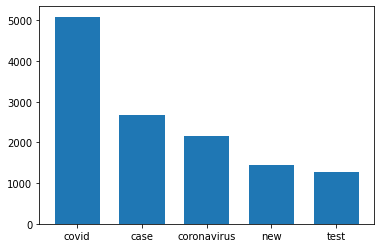

In [228]:
# Visualize Top 5 unigrams
indexes = np.arange(len(top_ten_count.keys()))
width = 0.7
plt.bar(indexes, top_ten_count,width)
plt.xticks(indexes, top_ten_count.keys())
plt.show()

### TD-IDF Method (Term Frequency-Inverse Document Frequency)

In [278]:
# Convert each word into a meaningful numbers which reflects the level of importance of the word in the news
#tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)
def identity_tokenizer(text):
    return text
# Fit the tokenized data to td-idf vector
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, ngram_range=(1,4),use_idf=True,smooth_idf=True, lowercase = False)    
tfidf.fit_transform(clean_train_data)

<8560x292451 sparse matrix of type '<class 'numpy.float64'>'
	with 493634 stored elements in Compressed Sparse Row format>

# Modeling Different Classifiers with Bag-of-Word features

In [253]:
def k_fold_cross_validation(classifier):
    
    k_fold = KFold(n_splits=5)
    f1_scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(main_train_df):
        train_text = main_train_df.iloc[train_ind]['tweet'] 
        train_y = main_train_df.iloc[train_ind]['label']
    
        test_text = main_train_df.iloc[test_ind]['tweet']
        test_y = main_train_df.iloc[test_ind]['label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        f1score = f1_score(test_y,predictions)
        acc_score = accuracy_score(test_y, predictions)
        prec_score = precision_score(test_y, predictions)
        rec_score = recall_score(test_y, predictions)
        
        
        f1_scores.append(f1score)
        accuracy_scores.append(acc_score)
        precision_scores.append(prec_score)
        recall_scores.append(rec_score)
    
    return (print('Total tweets classified:', len(main_train_df)),
    print('F1-Score:', round(sum(f1_scores)/len(f1_scores) * 100, 2),'%'),
    print("Accuracy:",round(sum(accuracy_scores)/len(accuracy_scores) * 100, 2),'%'),
    print("Precision:",round(sum(precision_scores)/len(precision_scores) * 100, 2), '%'),
    print("Recall:",round(sum(recall_scores)/len(recall_scores), 2) * 100, '%'),
    print('Confusion matrix:'),
    print(confusion))



In [254]:
# Baseline score
# "If you have a classification problem, you can select the class that has the most observations and use that class as the result for all predictions."
# Source from: https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/

# In this case, 1 or real is the class that has the most observations, I would expect my model to be better than 52%.
main_train_df['label'].value_counts(normalize=True)

1    0.523364
0    0.476636
Name: label, dtype: float64

### 1. Classifier using Logistic Regression

In [ ]:
# Create the model

log_reg_pipeline = Pipeline([('LogRCV',count_vect), ('LogR_clf', LogisticRegression())])
# Fit the train data into the model
log_reg_pipeline.fit(main_train_df['tweet'],main_train_df['label'])
print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(log_reg_pipeline))

# print('\n-------- K-fold cross validation result on Validation Set --------')
# print(k_fold_cross_validation(log_reg_pipeline, valid_df))

# print('\n-------- Evaluation results on validation set --------')
# val_log_reg = log_reg_pipeline.predict(valid_df['tweet'])

# # print(classification_report(valid_df['label'], val_log_reg))
# print("Mean score: ", np.mean(val_log_reg == valid_df['label']))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_log_reg)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_log_reg)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_log_reg)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_log_reg)*100, 2), '%')
# print('-------- K-fold cross validation result --------')
# print(build_confusion_matrix(log_reg_pipeline))

### 2. Classifier using Naive Bayes

In [256]:
# Create the model
nbayes_pipeline = Pipeline([('NBCV', count_vect),('nb_clf',MultinomialNB())])
# Fit the train data into the model
nbayes_pipeline.fit(main_train_df['tweet'],main_train_df['label'])

print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(nbayes_pipeline))
# print('\n-------- K-fold cross validation result on Validation Set --------')
# print(k_fold_cross_validation(nbayes_pipeline, valid_df))

# print('\n-------- Evaluation results on validation set --------')
# # Test by predicting the result for data in testing set.
# val_nbayes = nbayes_pipeline.predict(valid_df['tweet'])
# print('Mean score: ', np.mean(val_nbayes == valid_df['label']))
# # print(classification_report(test_df['label'], test_nbayes))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_nbayes)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_nbayes)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_nbayes)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_nbayes)*100, 2), '%')



-------- K-fold cross validation result --------
Total tweets classified: 8560
F1-Score: 77.74 %
Accuracy: 77.21 %
Precision: 79.53 %
Recall: 76.0 %
Confusion matrix:
[[3202  878]
 [1073 3407]]
(None, None, None, None, None, None, None)


### 3. Classifier using Random Forest

In [257]:
# Create the model
random_forest_pipeline = Pipeline([('rfCV', count_vect),('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))])
# Fit the train data into the model
random_forest_pipeline.fit(main_train_df['tweet'],main_train_df['label'])

print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(random_forest_pipeline))
# print('\n-------- K-fold cross validation result on Validation Set --------')
# print(k_fold_cross_validation(random_forest_pipeline, valid_df))

# print('\n-------- Evaluation results on validation set --------')
# val_random_forest = random_forest_pipeline.predict(valid_df['tweet'])
# # Calculate mean of results.
# print('Mean score: ', np.mean(val_random_forest == valid_df['label']))
# # print(classification_report(test_df['label'], test_random_forest))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_random_forest)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_random_forest)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_random_forest)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_random_forest)*100, 2), '%')


-------- K-fold cross validation result --------
Total tweets classified: 8560
F1-Score: 91.91 %
Accuracy: 91.25 %
Precision: 89.09 %
Recall: 95.0 %
Confusion matrix:
[[3559  521]
 [ 228 4252]]
(None, None, None, None, None, None, None)


### 4. Classifier using SVM

In [ ]:
svm_pipeline = Pipeline([('svmCV',count_vect), ('svm_clf',svm.LinearSVC())])
svm_pipeline.fit(main_train_df['tweet'],main_train_df['label'])

print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(svm_pipeline))
# print('\n-------- K-fold cross validation result on Validation Set --------')
# print(k_fold_cross_validation(svm_pipeline, valid_df))

# print('\n-------- Evaluation results on validation set --------')
# val_svm = svm_pipeline.predict(valid_df['tweet'])

# print('Mean score: ', np.mean(val_svm == valid_df['label']))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_svm)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_svm)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_svm)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_svm)*100, 2), '%')

# Modeling Different Classifiers with TF-IDF features

### 5. Classifier using Logistic Regression

In [ ]:
# Create the model
log_reg_tfidf_pipeline = Pipeline([('LogR_tfidf',tfidf), ('LogR_clf',LogisticRegression())])
# Fit the train data into the model
log_reg_tfidf_pipeline.fit(main_train_df['tweet'],main_train_df['label'])

print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(svm_pipeline))

# # Test by predicting the result for data in testing set.
# val_log_reg_tfidf = log_reg_tfidf_pipeline.predict(valid_df['tweet'])
# # print(np.mean(test_log_reg_tfidf == test_df['label']))
# # print(classification_report(test_df['label'], test_log_reg_tfidf))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_log_reg_tfidf)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_log_reg_tfidf)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_log_reg_tfidf)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_log_reg_tfidf)*100, 2), '%')

### 6. Classifier using Naive Bayes

In [261]:
# Create the model
nbayes_tfidf_pipeline = Pipeline([('nb_tfidf', tfidf),('nb_clf',MultinomialNB())])
# Fit the train data into the model
nbayes_tfidf_pipeline.fit(main_train_df['tweet'], main_train_df['label'])
print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(nbayes_tfidf_pipeline))

# # Test by predicting the result for data in testing set.
# val_nbayes_tfidf = nbayes_tfidf_pipeline.predict(valid_df['tweet'])
# # Calculate mean of results.
# # print('Mean score: ', np.mean(test_nbayes_tfidf == test_df['label']))
# # print(classification_report(test_df['label'], test_nbayes_tfidf))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_nbayes_tfidf)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_nbayes_tfidf)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_nbayes_tfidf)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_nbayes_tfidf)*100, 2), '%')


-------- K-fold cross validation result --------
Total tweets classified: 8560
F1-Score: 88.33 %
Accuracy: 86.29 %
Precision: 79.59 %
Recall: 99.0 %
Confusion matrix:
[[2940 1140]
 [  34 4446]]
(None, None, None, None, None, None, None)


### 7. Classifier using Random Forest

In [262]:
random_forest_tfidf_pipeline = Pipeline([('rf_tfidf',tfidf),('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))])
    
random_forest_tfidf_pipeline.fit(main_train_df['tweet'],main_train_df['label'])

print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(random_forest_tfidf_pipeline))
# val_rf_tfidf = random_forest_tfidf_pipeline.predict(valid_df['tweet'])
# # print('Mean score: ', np.mean(test_rf_tfidf == test_df['label']))
# # print(classification_report(test_df['label'], test_rf_tfidf))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_rf_tfidf)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_rf_tfidf)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_rf_tfidf)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_rf_tfidf)*100, 2), '%')


-------- K-fold cross validation result --------
Total tweets classified: 8560
F1-Score: 94.12 %
Accuracy: 93.73 %
Precision: 92.37 %
Recall: 96.0 %
Confusion matrix:
[[3725  355]
 [ 182 4298]]
(None, None, None, None, None, None, None)


### 8. Classifier using SVM

In [294]:
svm_tfidf_pipeline = Pipeline([('svm_tfidf',tfidf), ('svm_clf',svm.LinearSVC())])
svm_tfidf_pipeline.fit(main_train_df['tweet'],main_train_df['label'])
print('\n-------- K-fold cross validation result --------')
print(k_fold_cross_validation(svm_tfidf_pipeline))


# val_svm_tfidf = svm_tfidf_pipeline.predict(valid_df['tweet'])
# # print(np.mean(test_svm_tfidf == test_df['label']))
# # print(classification_report(test_df['label'], test_svm_tfidf))
# print("Accuracy:",round(accuracy_score(valid_df['label'], val_svm_tfidf)*100, 2),'%')
# print("Precision:",round(precision_score(valid_df['label'], val_svm_tfidf)*100, 2), '%')
# print("Recall:",round(recall_score(valid_df['label'], val_svm_tfidf)*100, 2), '%')
# print("F1-score:",round(f1_score(valid_df['label'], val_svm_tfidf)*100, 2), '%')


-------- K-fold cross validation result --------
Total tweets classified: 8560
F1-Score: 96.58 %
Accuracy: 96.39 %
Precision: 95.74 %
Recall: 97.0 %
Confusion matrix:
[[3886  194]
 [ 115 4365]]
(None, None, None, None, None, None, None)


Through 8 models' classification reports, I take out the best two models that show the best performance in terms of precision, recall, f-1 score and accuracy. Models that produce results more than 0.9 are prefered.
Best performing models: 7,8

# FIND BEST PARAMETERS TO OPTIMIZE SELECTED MODELS BY GRIDSEARCH

The GridSearchCV function is used to find out the best parameters for each pipeline. Thus they can be used to optimize the selected models

### Model 8: SVM and TF-IDF

In [ ]:
init_params_svm = {'svm_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
                   'svm_tfidf__use_idf': (True, False),
                   'svm_tfidf__smooth_idf': (True, False),
                   'svm_clf__penalty': ('l1','l2'),
}

gs_clf_svm = GridSearchCV(svm_tfidf_pipeline, init_params_svm, n_jobs=-1)
gs_clf_svm= gs_clf_svm.fit(main_train_df['tweet'][:10000],main_train_df['label'][:10000])

print("Best score:", gs_clf_svm.best_score_)
print("Train score", gs_clf_svm.score(main_train_df['tweet'][:10000], main_train_df['label'][:10000]))
print("Test score", gs_clf_svm.score(test_df['tweet'][:10000], test_df['label'][:10000]))

gs_clf_svm.best_params_

### Model 7: Random Forest and TF-IDF

In [291]:
init_params_rf = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
                  'rf_tfidf__use_idf': (True, False),
                  'rf_clf__max_depth': (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
}

gs_clf_rf = GridSearchCV(random_forest_tfidf_pipeline, init_params_rf, n_jobs=-1)
gs_clf_rf = gs_clf_rf.fit(main_train_df['tweet'][:10000],main_train_df['label'][:10000])

print("Best score:", gs_clf_rf.best_score_)
print("Train score", gs_clf_rf.score(main_train_df['tweet'][:10000], main_train_df['label'][:10000]))
print("Test score", gs_clf_rf.score(test_df['tweet'][:10000], test_df['label'][:10000]))

gs_clf_rf.best_params_

Best score: 0.9258177570093459
Train score 0.9940420560747664
Test score 0.9186915887850468


{'rf_clf__max_depth': 15,
 'rf_tfidf__ngram_range': (1, 2),
 'rf_tfidf__use_idf': True}

### Retrain the best models with the best parameters

In [292]:
random_forest_tfidf_pipeline_final = Pipeline([('rf_tfidf',TfidfVectorizer(ngram_range=(1,2), use_idf=True,stop_words='english')),('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))])
    
random_forest_tfidf_pipeline_final.fit(main_train_df['tweet'],main_train_df['label'])
test_rf_tfidf_final = random_forest_tfidf_pipeline_final.predict(test_df['tweet'])

print("Accuracy:",round(accuracy_score(test_df['label'], test_rf_tfidf_final)*100, 2),'%')
print("Precision:",round(precision_score(test_df['label'], test_rf_tfidf_final)*100, 2), '%')
print("Recall:",round(recall_score(test_df['label'], test_rf_tfidf_final)*100, 2), '%')
print("F1-score:",round(f1_score(test_df['label'], test_rf_tfidf_final)*100, 2), '%')
print(classification_report(test_df['label'], test_rf_tfidf_final))
cnf_rf_matrix = confusion_matrix(test_df['label'], test_rf_tfidf_final)
print(cnf_rf_matrix)

Accuracy: 92.15 %
Precision: 95.42 %
Recall: 89.29 %
F1-score: 92.25 %
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1020
           1       0.95      0.89      0.92      1120

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

[[ 972   48]
 [ 120 1000]]


In [296]:
svm_tfidf_pipeline_final = Pipeline([('svm_tfidf',TfidfVectorizer(ngram_range=(1,5), use_idf=True,smooth_idf=True)), ('svm_clf',svm.LinearSVC(penalty='l2'))])
svm_tfidf_pipeline_final.fit(main_train_df['tweet'],main_train_df['label'])

test_svm_tfidf_final = svm_tfidf_pipeline_final.predict(test_df['tweet'])

print("Accuracy:",round(accuracy_score(test_df['label'], test_svm_tfidf_final)*100, 2),'%')
print("Precision:",round(precision_score(test_df['label'], test_svm_tfidf_final)*100, 2), '%')
print("Recall:",round(recall_score(test_df['label'], test_svm_tfidf_final)*100, 2), '%')
print("F1-score:",round(f1_score(test_df['label'], test_svm_tfidf_final)*100, 2), '%')
print(classification_report(test_df['label'], test_svm_tfidf_final))
cnf_svm_matrix = confusion_matrix(test_df['label'], test_svm_tfidf_final)
print(cnf_svm_matrix)

Accuracy: 90.79 %
Precision: 85.97 %
Recall: 98.48 %
F1-score: 91.8 %
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      1020
           1       0.86      0.98      0.92      1120

    accuracy                           0.91      2140
   macro avg       0.92      0.90      0.91      2140
weighted avg       0.92      0.91      0.91      2140

[[ 840  180]
 [  17 1103]]


In [268]:
roc_auc_rf = roc_auc_score(test_df['label'], test_rf_tfidf_final)
print(roc_auc_rf)

0.9249999999999999


Text(0.5, 257.44, 'Predicted label')

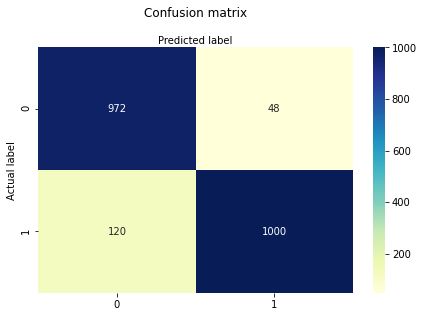

In [298]:
# Code from https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

# name  of classes
class_names=[0,1] 

# Set fig and axes 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sb.heatmap(pd.DataFrame(cnf_rf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')